In [69]:
"""
Created on Wed Sep  1 10:23:42 2021

@author: Siamak Khatami
@Email: siamak.khatami@ntnu.no
@License: https://creativecommons.org/licenses/by-nc-sa/4.0/
@Source: https://github.com/copatrec/copatrec
@document: https://github.com/copatrec/copatrec
@Cite:

"""

'\nCreated on Wed Sep  1 10:23:42 2021\n\n@author: Siamak Khatami\n@Email: siamak.khatami@ntnu.no\n@License: https://creativecommons.org/licenses/by-nc-sa/4.0/\n@Source: https://github.com/copatrec/copatrec\n@document: https://github.com/copatrec/copatrec\n@Cite:\n\n'

# How to use Copatrec
To use Copatrec, it should be either cloned from the GitHub, or installed using either the package files (pip and py providers will be ready in future)
# Required packages to use Copatrec
If the package is imported from GitHub, then it would be suggested to install these packages in your system.
warnings
matplotlib
numpy
pandas
scipy
seaborn
sklearn
pickle

In [70]:
try:
    from copatrec import Copatrec
except ImportError:
    from .copatrec import Copatrec
import pandas as pd

Import data using pandas

In [71]:
data = pd.read_pickle("./Data/Data.pkl") #Reading File

In [72]:
print(data.head(5))

   year countryname gdppc  Government Integrity  Investment Freedom  MobCelSub
0  1960       Aruba   NaN                   NaN                 NaN        0.0
1  1961       Aruba   NaN                   NaN                 NaN        NaN
2  1962       Aruba   NaN                   NaN                 NaN        NaN
3  1963       Aruba   NaN                   NaN                 NaN        NaN
4  1964       Aruba   NaN                   NaN                 NaN        NaN


As illustrated, we have a panel data set for different years and different countries. The data set holds data for gdppc, government integrity, investment freedom and mobile cellphone subscription. Let us evaluate the data set a little before using Copatrec.

In [73]:
data.columns  # See which columns do we have in the data.

Index(['year', 'countryname', 'gdppc', 'Government Integrity',
       'Investment Freedom', 'MobCelSub'],
      dtype='object')

# Data Sources
## heritage:
    Government Integrity, Investment Freedom
    https://www.heritage.org/index/
## World bank:
    gdppc, MobCelSub
    https://data.worldbank.org/

In [74]:
data_gp = data.groupby(['countryname'])

In [75]:
data_gp_statistics = data_gp.describe()

In [76]:
data_gp_statistics

year                                             \
                      count    mean        std     min     25%     50%   
countryname                                                              
Afghanistan            61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Albania                61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Algeria                61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
American Samoa         61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Andorra                61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
...                     ...     ...        ...     ...     ...     ...   
Virgin Islands (U.S.)  61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
West Bank and Gaza     61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Yemen, Rep.            61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Zambia                 61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Zimbabwe               61.0  1990.0  17.752934  1960.0  1975.0  1990.0   

                                      Government Integrity             ...  \
                          75%     max                count       mean  ...   
countryname                                                            ...   
Afghanistan            2005.0  2020.0                  8.0  18.587500  ...   
Albania                2005.0  2020.0                 26.0  24.623077  ...   
Algeria                2005.0  2020.0                 26.0  37.638462  ...   
American Samoa         2005.0  2020.0                  0.0        NaN  ...   
Andorra                2005.0  2020.0                  0.0        NaN  ...   
...                       ...     ...                  ...        ...  ...   
Virgin Islands (U.S.)  2005.0  2020.0                  0.0        NaN  ...   
West Bank and Gaza     2005.0  2020.0                  0.0        NaN  ...   
Yemen, Rep.            2005.0  2020.0                  0.0        NaN  ...   
Zambia                 2005.0  2020.0                 26.0  33.626923  ...   
Zimbabwe               2005.0  2020.0                 26.0  25.061538  ...   

                      Investment Freedom       MobCelSub             \
                                     75%   max     count       mean   
countryname                                                           
Afghanistan                         57.5  65.0      48.0  13.339800   
Albania                             70.0  75.0      48.0  32.424179   
Algeria                             50.0  70.0      48.0  29.932378   
American Samoa                       NaN   NaN      30.0   1.215227   
Andorra                              NaN   NaN      48.0  34.708272   
...                                  ...   ...       ...        ...   
Virgin Islands (U.S.)                NaN   NaN      28.0  12.724776   
West Bank and Gaza                   NaN   NaN      23.0  37.557637   
Yemen, Rep.                          NaN   NaN      47.0  13.632878   
Zambia                              70.0  70.0      48.0  17.323122   
Zimbabwe                            25.0  30.0      48.0  20.068727   

                                                                       \
                             std  min       25%        50%        75%   
countryname                                                             
Afghanistan            22.563973  0.0  0.000000   0.000000  20.042080   
Albania                46.184945  0.0  0.000000   0.037112  65.901501   
Algeria                45.405783  0.0  0.000000   0.029044  78.541546   
American Samoa          1.495664  0.0  0.000000   0.000000   2.500960   
Andorra                40.359550  0.0  0.000000   6.475734  76.971701   
...                          ...  ...       ...        ...        ...   
Virgin Islands (U.S.)  21.354733  0.0  0.000000   0.000000  24.173185   
West Bank and Gaza     33.914496  0.0  6.379534  27.192649  72.909590   
Yemen, Rep.            22.801030  0.0  0.000000   0.056952  17.414310   
Zambia                

# Number of years
Each country has a data set for 61 years. The data is unbalanced, which means, some countries have null values.

In [77]:
data_gp_statistics.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='countryname', length=217)

There are also 217 countries in the data set.

# An example study
As an example, here the aim is to study `gdppc` (as the dependent variable) and see what is the relation between other variables `Government integrity` and `Mobile cellular subscriptions` (as independent variables) in pairs.
So using copatrec, if we pass the data to the copatrec functions, we can do a panel analysis (to look for a general relation among all countries(categories) for all times, or we can do a time series analysis to see the situation of each country, or we can run a cross-sectional analysis to see the relation of variables within each year. for each pair (x = `gdppc`, y = `Government Integrity`) and (x = `gdppc`, y = `Mobile cellular` subscriptions)
# Non liner forms
Copatrec has a set of pre-defined non-linear equation forms that can be used to imply the complexity of relationships. For more information please refer to the main paper of the package.
https://www.jstatsoft.org/index

To do this, First copatrec class from the copatrec package should be initialized.
To initiate Copatrec, we should pass `data` (in dataframe), `time column name`, `category column name` and `the name of dependent variable`. Then copatrec will arrange everything automatically for each of study types mentioned above.

In [78]:
Time_Col = 'year' # which column holds time
Category_Col = 'countryname' # Which column holds category data
Dep_Var = 'gdppc' # Which column represents Dependent variable

In [79]:
cpt = Copatrec(data=data,
               time_col=Time_Col,
               category_col=Category_Col,
               dependent_var=Dep_Var)

# Data Pre_processing
It is always recommended knowing the data set before implementing any data oriented scientific approach to do a study, and do some adjustments or corrections in the data set. For example, data set can contain Null/None/Nil values; Or there can be outliers in the data set due to any kind of reasons like wrong data sources, or data registering process. There can be some few number of data that their existence can prevent us from finding a general role, specially when it is about regressions and equalization mathematical forms.
Copatrec covers 3 steps of data preprocessing. While the data preprocessing contains many other steps that can be done, these three
items play more critical role than others.
## standardization of the data
Whether to standardize data before study or not. It will use a MinMax standardization method. It is highly recommend doing this while calling functions. Since there are some exponentiation in the equation forms, large values can make `Large Value Errors`.
## dropping Null values
Null values will be dropped in pair modes.
## recognizing outliers (optional)
This can be done in two ways. Either the outlier functions can be called or it can be passed to the analysis function to drop the outliers. We will show it later.


# Calling outlier functions
By calling outlier function, it will return two dictionaries, which hold intervals and outliers names respectively.
`intervals[variable name] = tuple(lower_band,upper_band)`
## Outlier methods
There are three kind of different ways to recognise outliers
 - beta distribution (default)
 - normal distribution
 - IQR

# Panel outliers
In panel data, outliers are spotted based on the mean of category groups. Dropping all data without taking the general behavior of the group into account can drop any lower,higher values from all categories. However, the aim in the panel data is to find a general role for all categories (here countries), and indeed some categories can be exception and is recommended to be studied in the time_series mode.

********Looking for the outliers********
Outliers have been dropped. It is highly recommended to check droppedvalues by an expert.


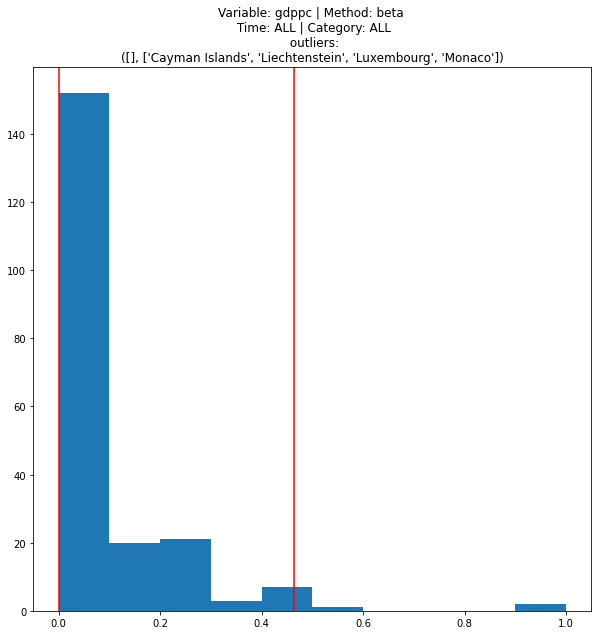

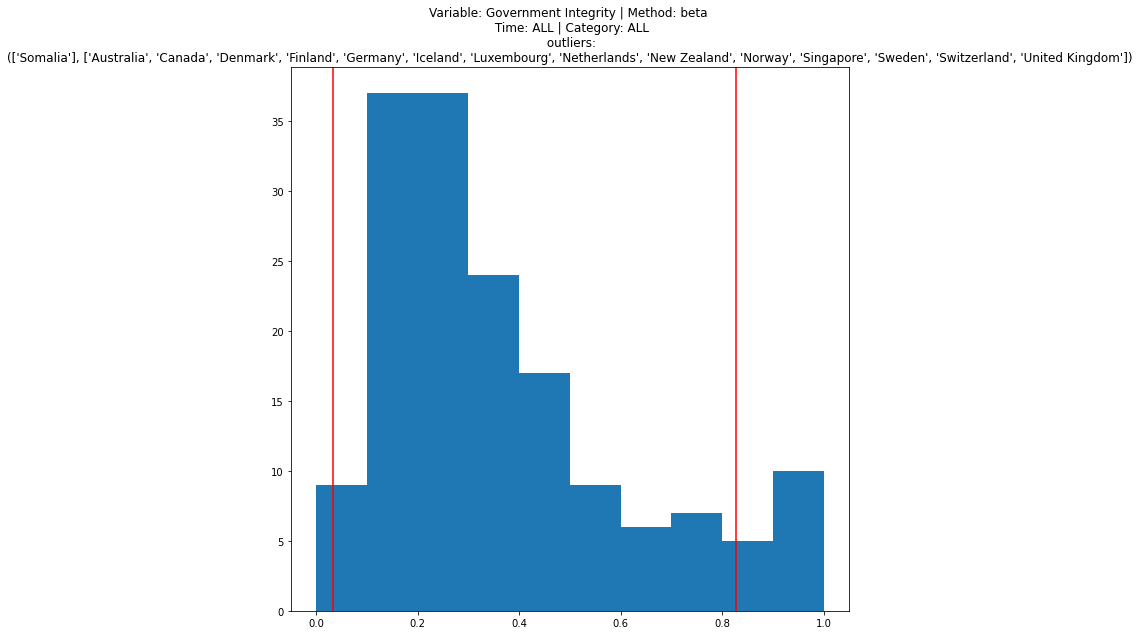

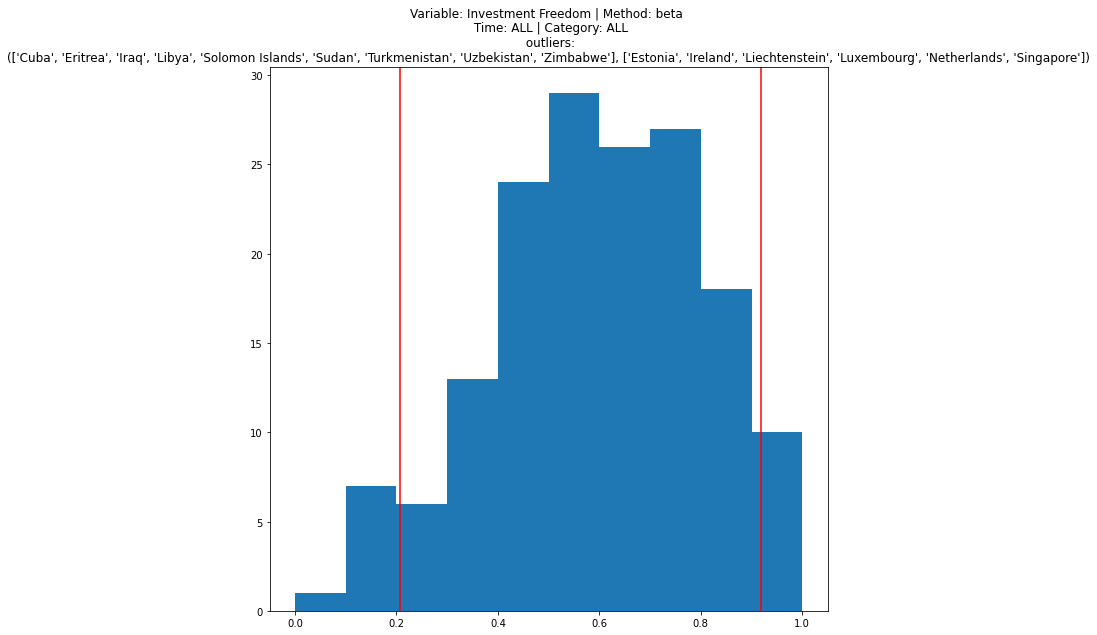

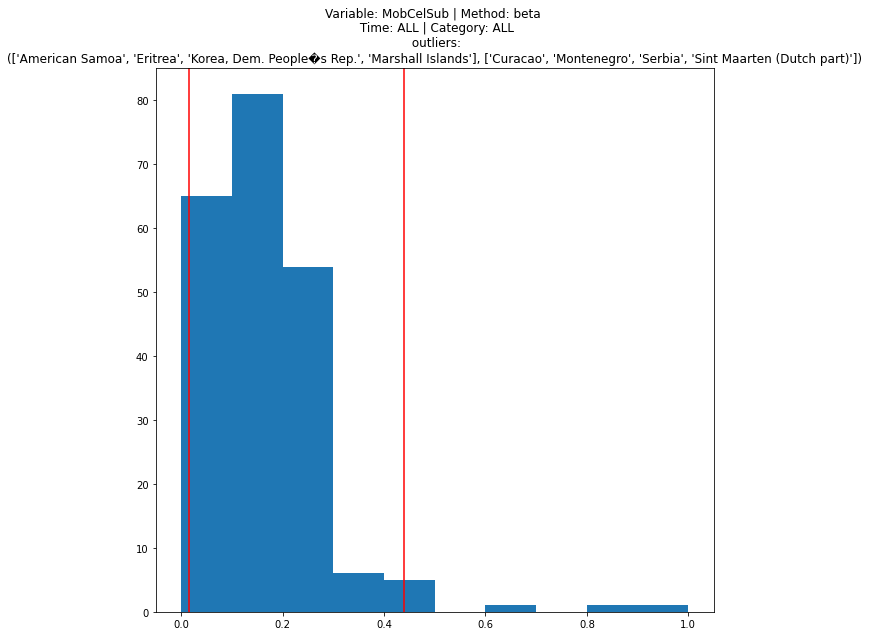

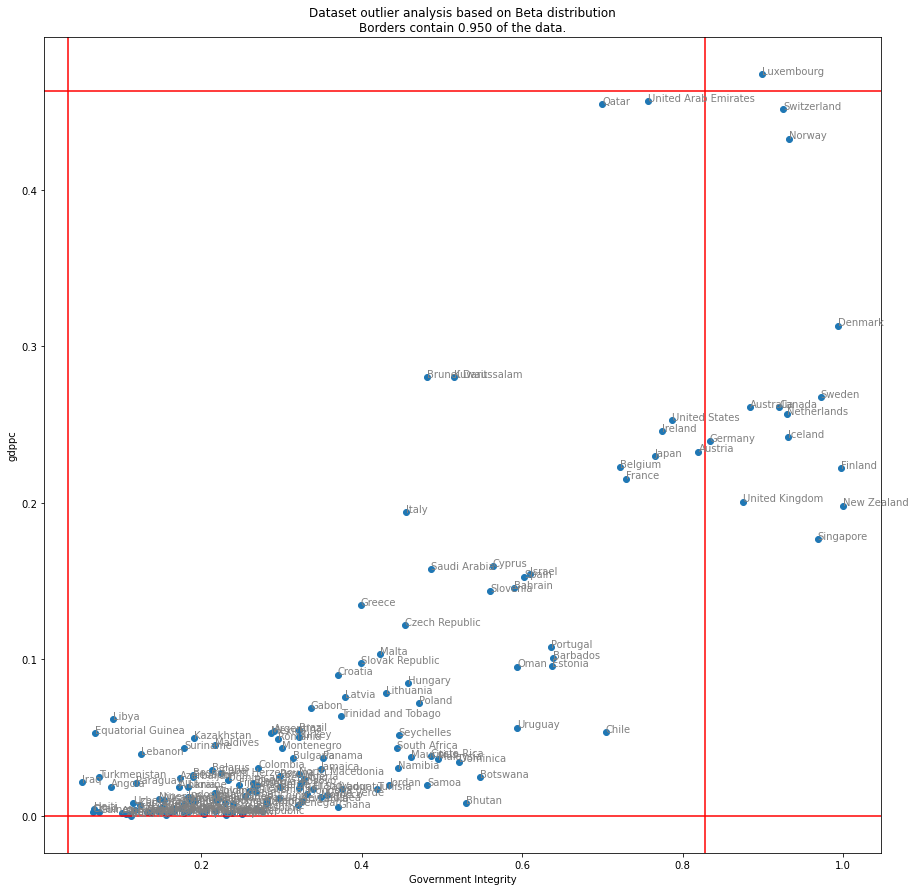

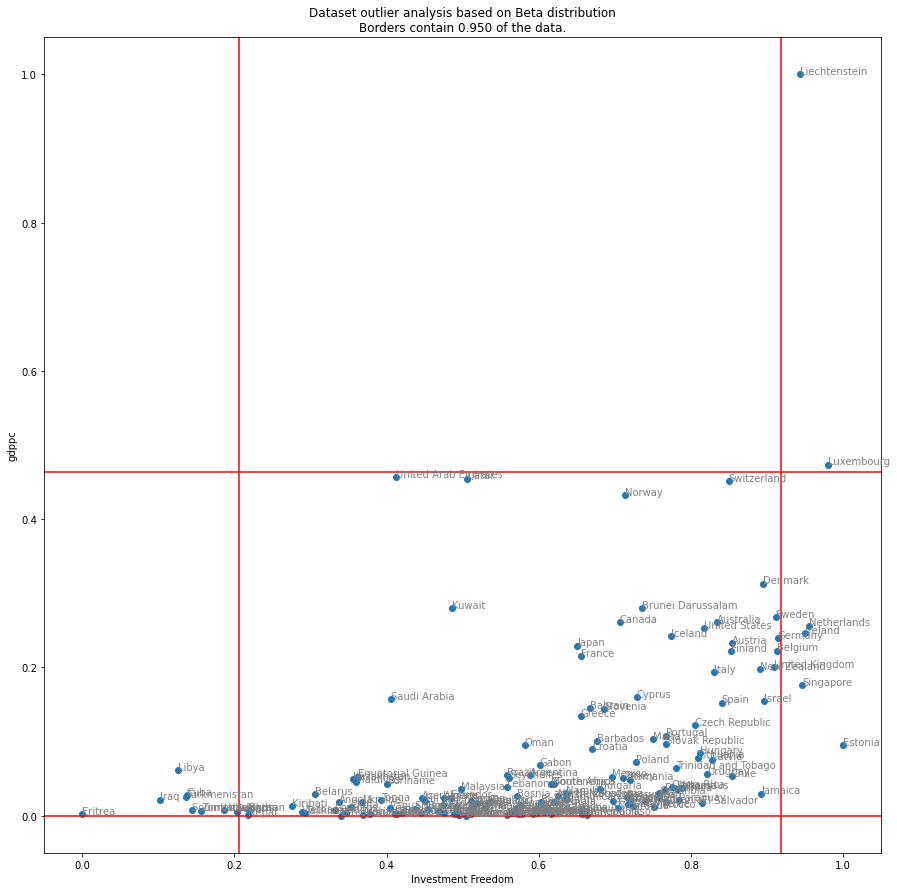

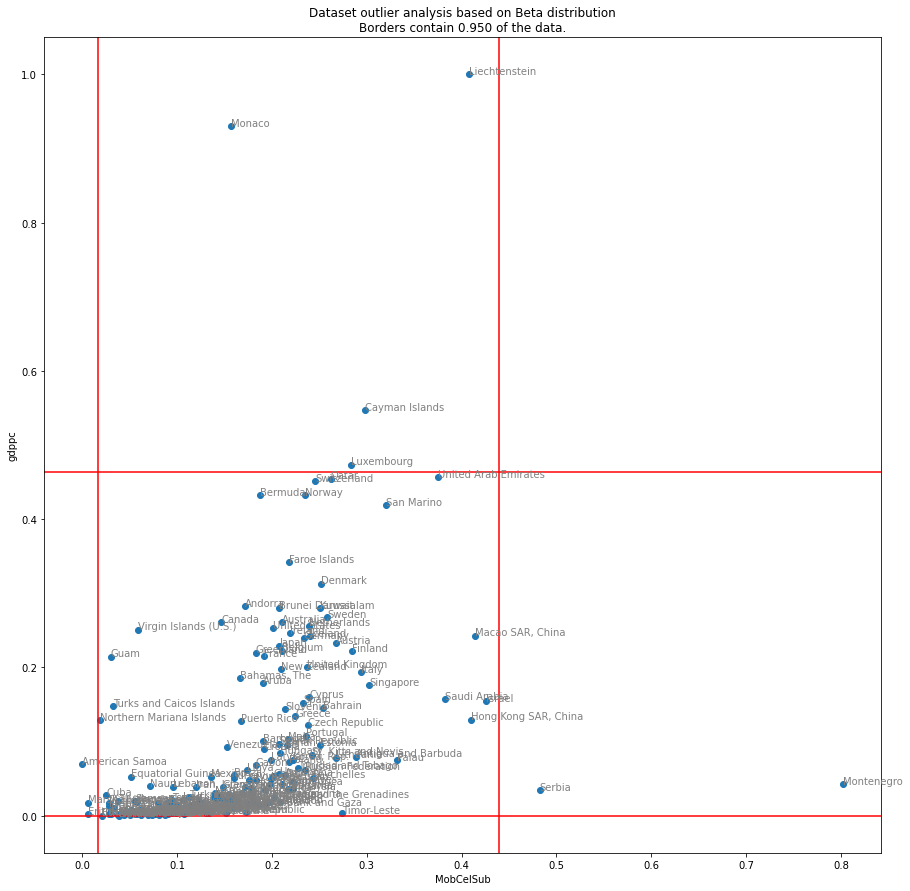

********Looking for the outliers********
Outliers have been dropped. It is highly recommended to check droppedvalues by an expert.
All rows are null/zero value and dropped for variable = gdppc, category = British Virgin Islands and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Channel Islands and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Curacao and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = French Polynesia and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Gibraltar and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Korea, Dem. People�s Rep. and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = New Caledonia and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Sint Maarten (Dutch part) and time = ALL.
All rows 

E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """



All rows are null/zero value and dropped for variable = Investment Freedom, category = Puerto Rico and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Russian Federation and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = San Marino and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Sao Tome and Principe and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Serbia and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Sint Maarten (Dutch part) and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Somalia and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = South Sudan and time = ALL.
All rows are null/zero value and dropped for variable = In

E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """


All rows are null/zero value and dropped for variable = MobCelSub, category = St. Martin (French part) and time = ALL.
********Looking for the outliers********
Outliers have been dropped. It is highly recommended to check droppedvalues by an expert.
All rows are null/zero value and dropped for variable = gdppc, category = ALL and time = 2020.
All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1960.
All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1961.
All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1962.
All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1963.
All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1964.
All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1

In [80]:
intervals, outliers = cpt.panel_outliers(sl=0.05,  # Significant level
                                         method='beta',  # beta, normal, IQR
                                         plot_pairs=True,
                                         plot_hists=True,
                                         plot_outliers_name=True)

In [ ]:
intervals_ts, outliers_ts = cpt.time_series_outliers(sl=0.05,  # Significant level
                                                     method='beta',  # beta, normal, IQR
                                                     plot_pairs=False,
                                                     plot_hists=False,
                                                     plot_outliers_name=False)

In [ ]:
intervals_crs, outliers_crs = cpt.cross_sectional_outliers(sl=0.05,  # Significant level
                                                           method='beta',  # beta, normal, IQR
                                                           plot_pairs=False,
                                                           plot_hists=False,
                                                           plot_outliers_name=False)

# Panel Regression
To fit the non-linear equation forms, copatrec is using Machine learning techniques.
In this case, an optimization approach in thousands of iterations is used (instead of direct mathematical approaches). Thus, the sum of squared errors is the measurement of good fitting.
## list of arguments and their default values
    max_epochs: int = 8000,
    alpha: float = 0.05,
    standardization: bool = True,
    drop_outliers: bool = False,
    outlier_method: str = 'beta',
    plot: bool = False,
    show_category_label: bool = False,
    show_time_label: bool = False,
    show_outliers: bool = False,
    plot_predicted_outliers: bool = False
## Structure of returned dictionaries
Opt_Forms_Dict[independent var] = summary object of the optimal equation format
All_Forms_Dict[independent var] = dictionary[equation forms] = summary object
All_Forms_Dict[independent var] = dictionary[equation forms] = error if there is any.

********Looking for the outliers********
Outliers have been dropped. It is highly recommended to check droppedvalues by an expert.
===X: gdppc, Y: Government Integrity====
******************sin*******************
Fitted


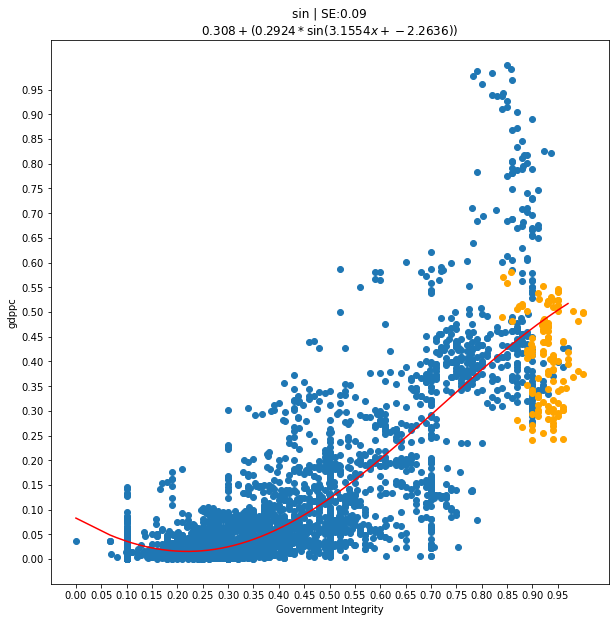

******************sinh******************
Fitted


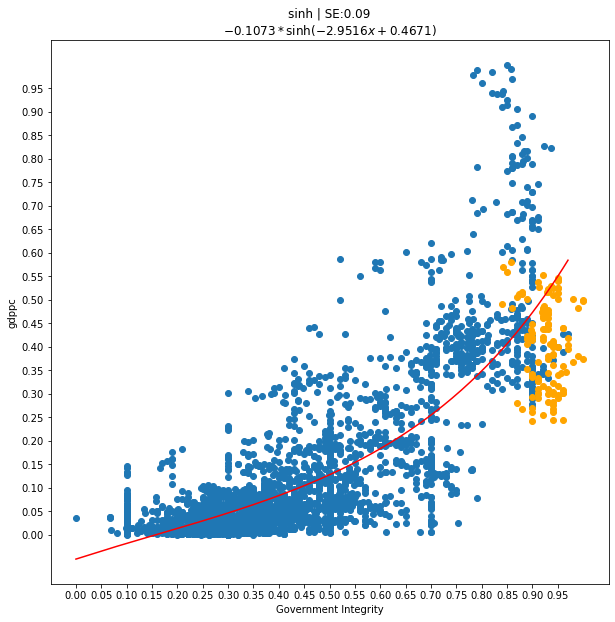

******************cos*******************
Fitted


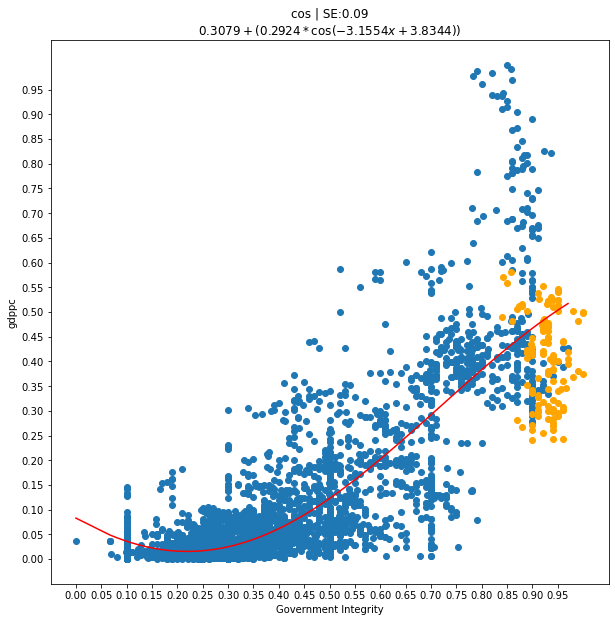

******************cosh******************
Fitted


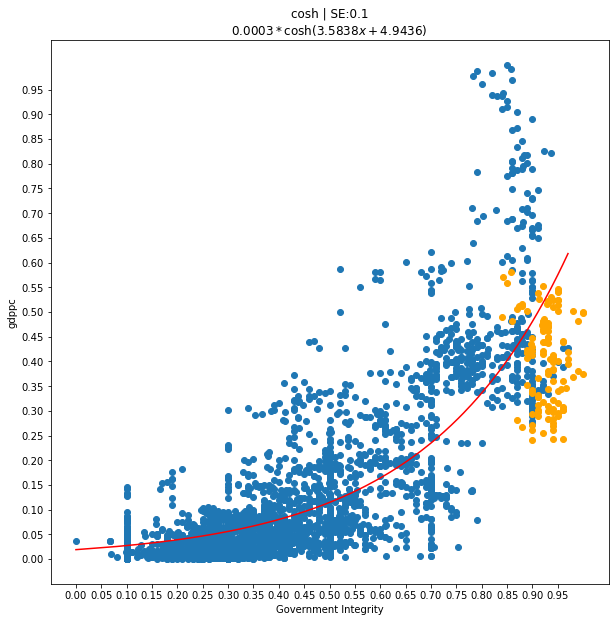

******************tan*******************
Fitted


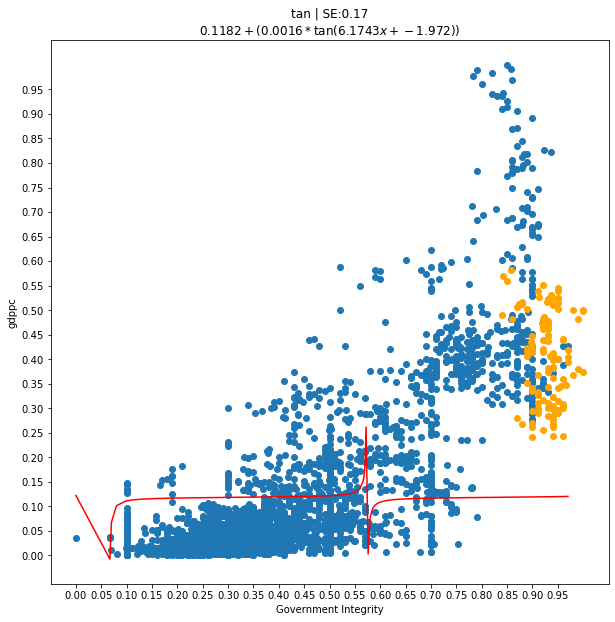

******************tanh******************
Fitted


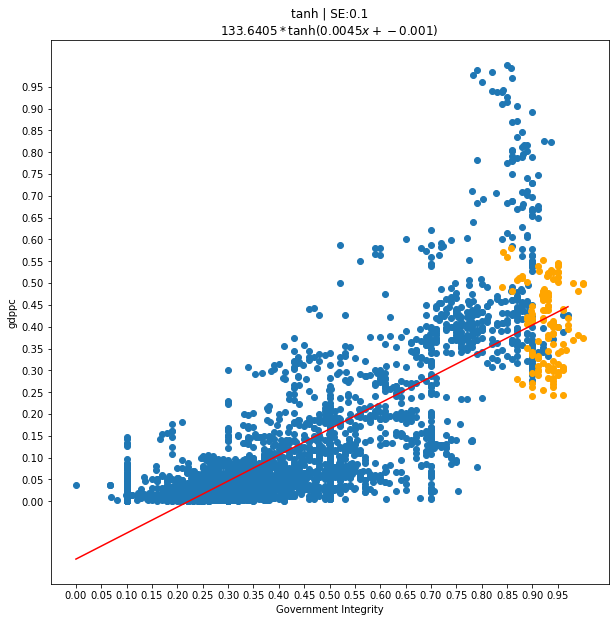

******************lnx*******************
Fitted


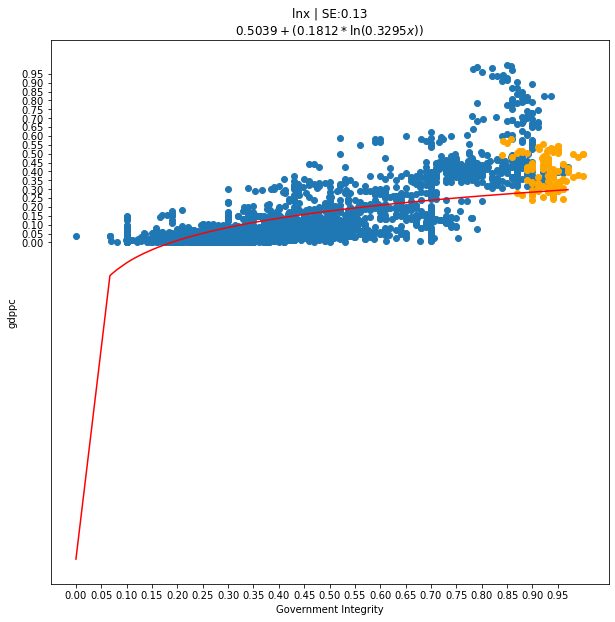

******************logx******************
Fitted


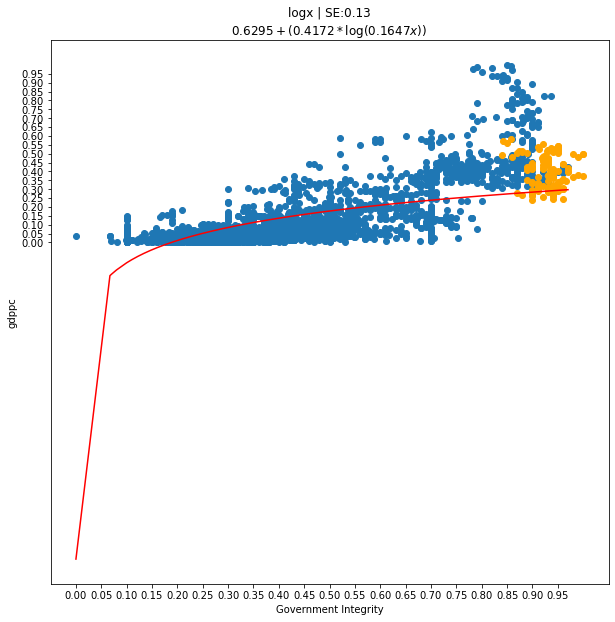

***************euler_exp****************
Fitted


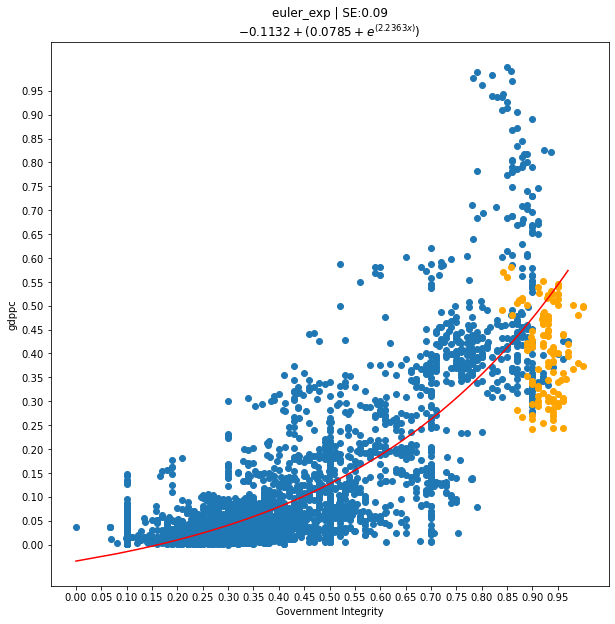

******************exp*******************
Fitted


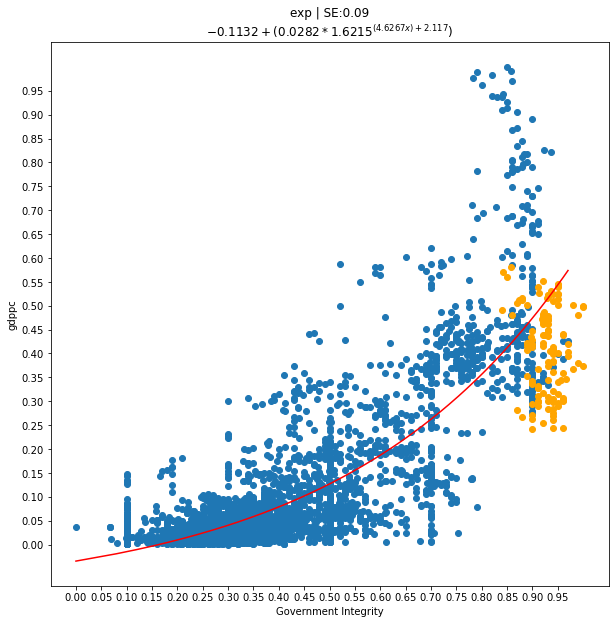

****************logistic****************
Fitted


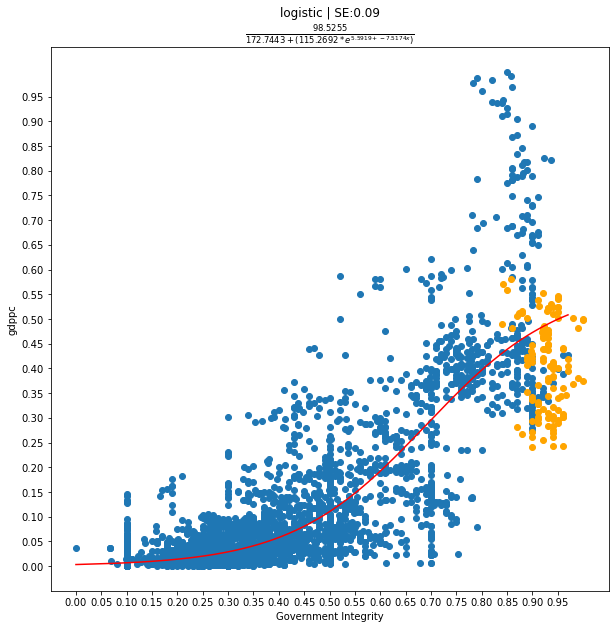

***************polynomial***************
Fitted


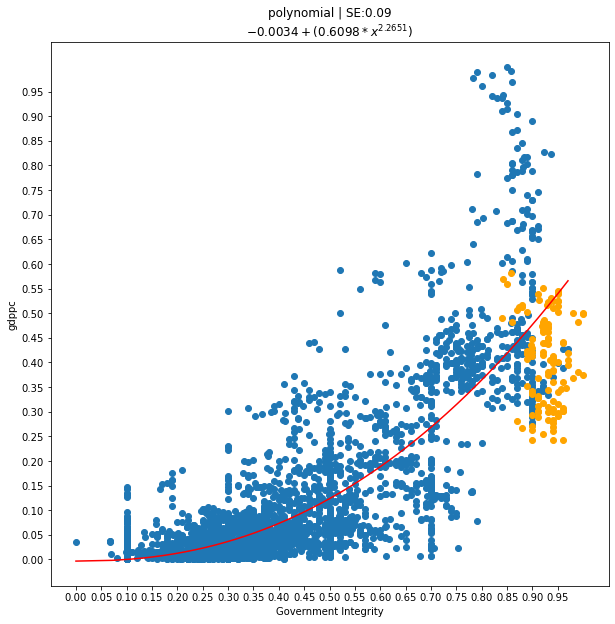

***********oscillating_growth***********
Fitted


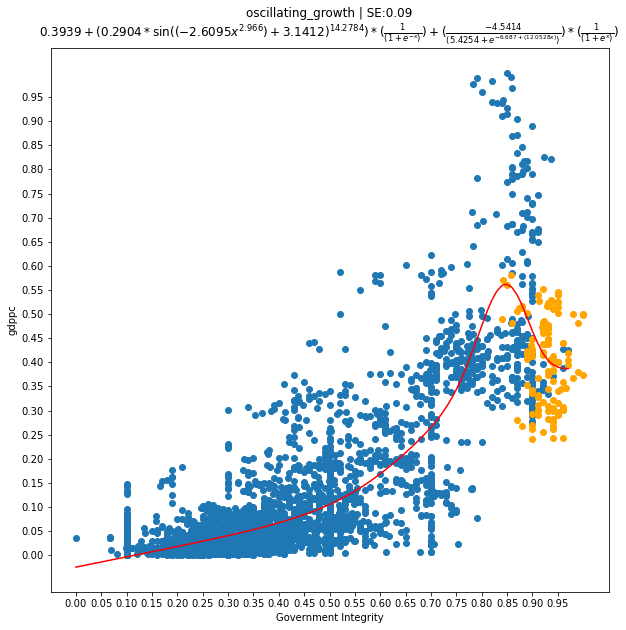

************double_gaussian*************
Fitted


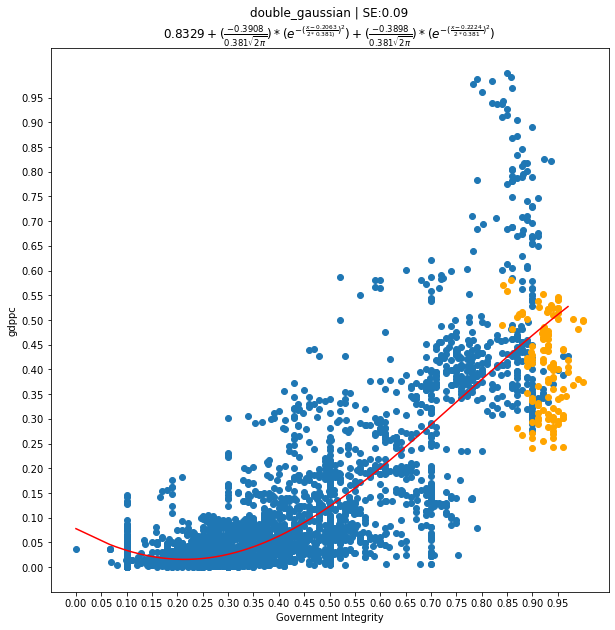

====X: gdppc, Y: Investment Freedom=====
******************sin*******************
Fitted


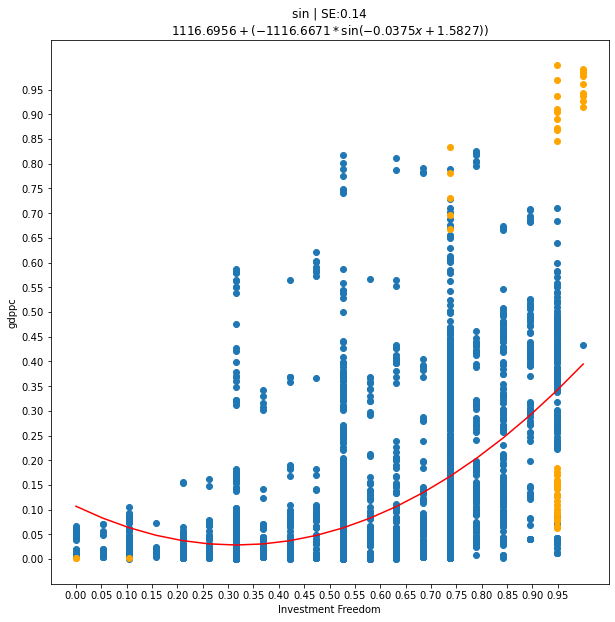

******************sinh******************
Fitted


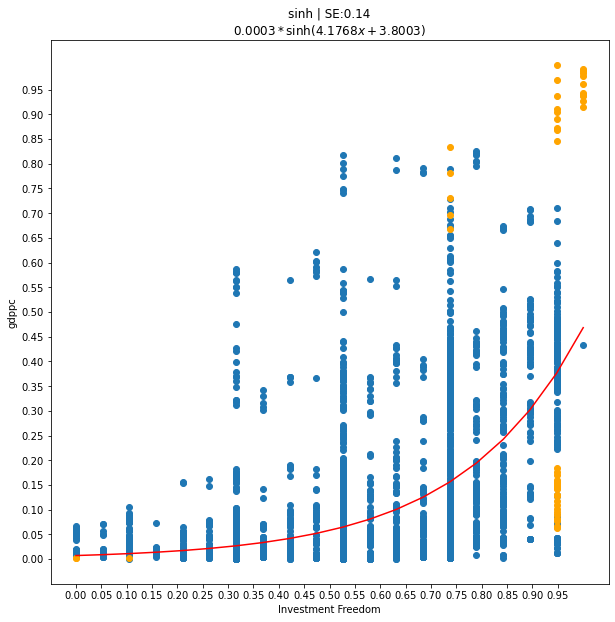

******************cos*******************
Fitted


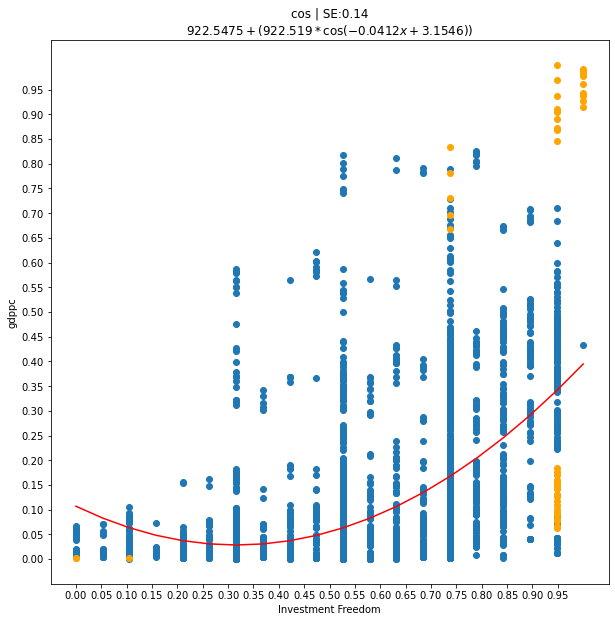

******************cosh******************
Fitted


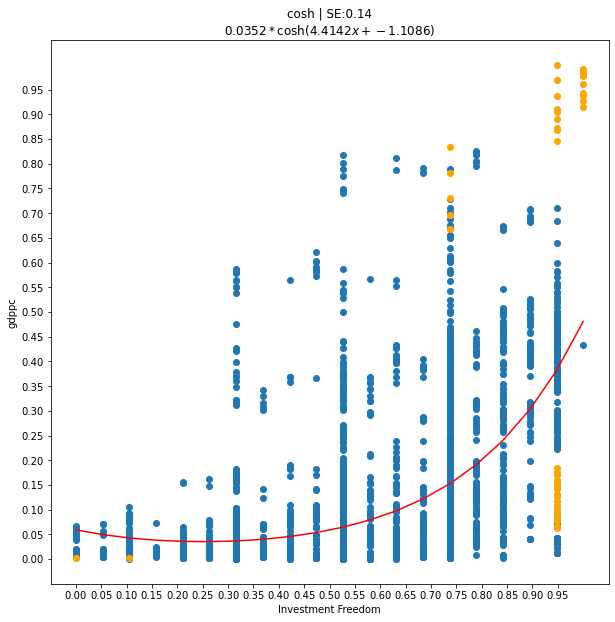

******************tan*******************
Fitted


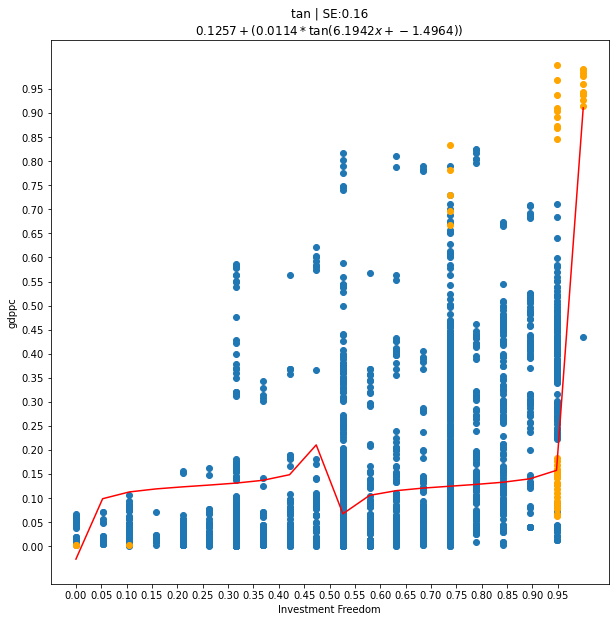

******************tanh******************
Fitted


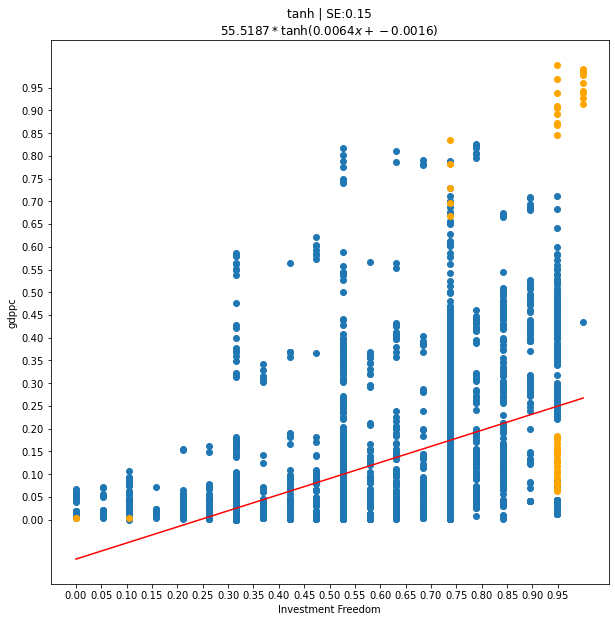

******************lnx*******************
Fitted


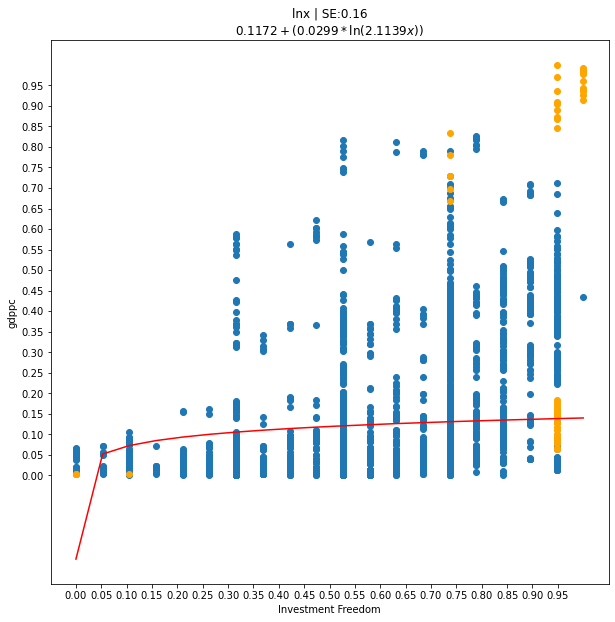

******************logx******************
Fitted


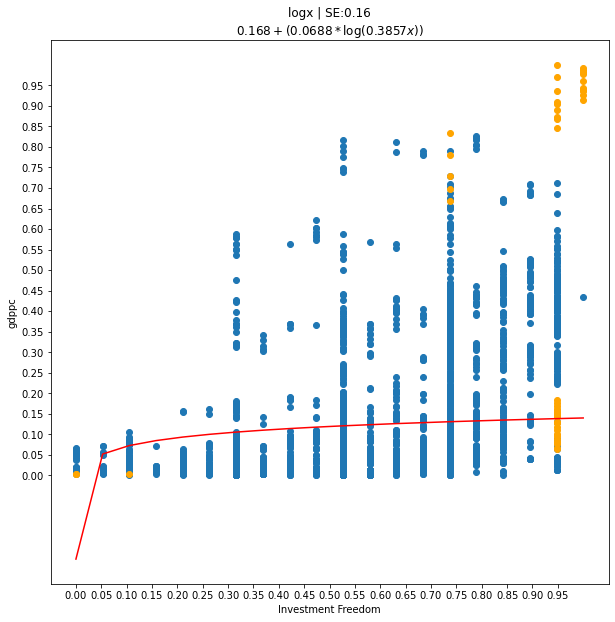

***************euler_exp****************
Fitted


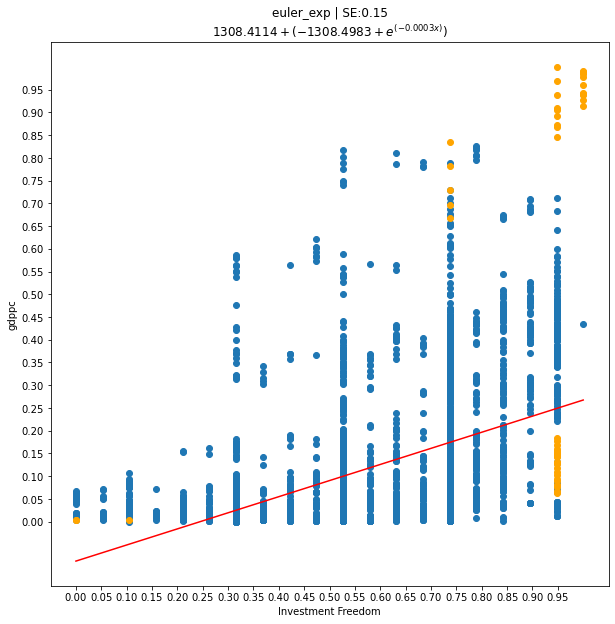

******************exp*******************
Fitted


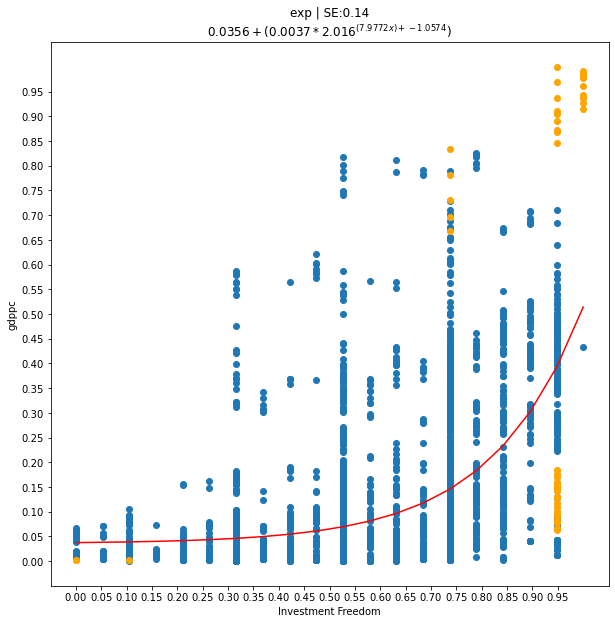

****************logistic****************
Fitted


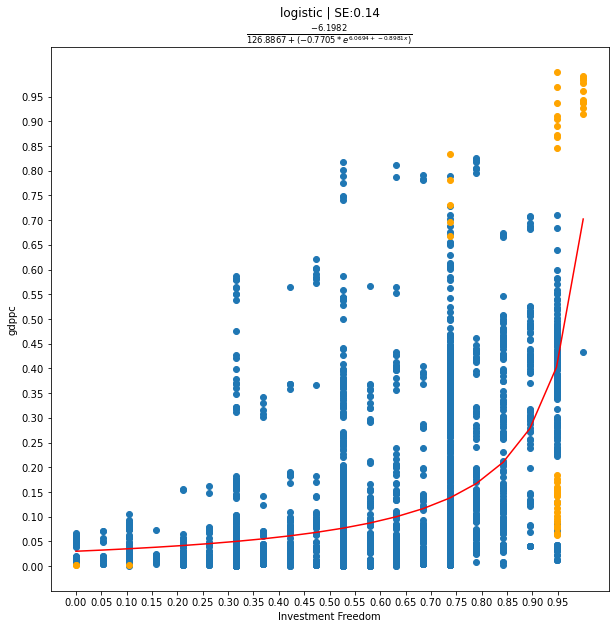

***************polynomial***************
Fitted


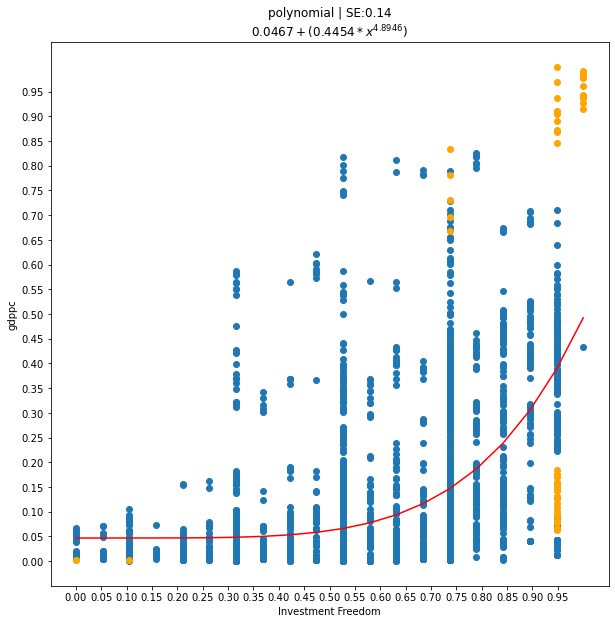

***********oscillating_growth***********
Fitted


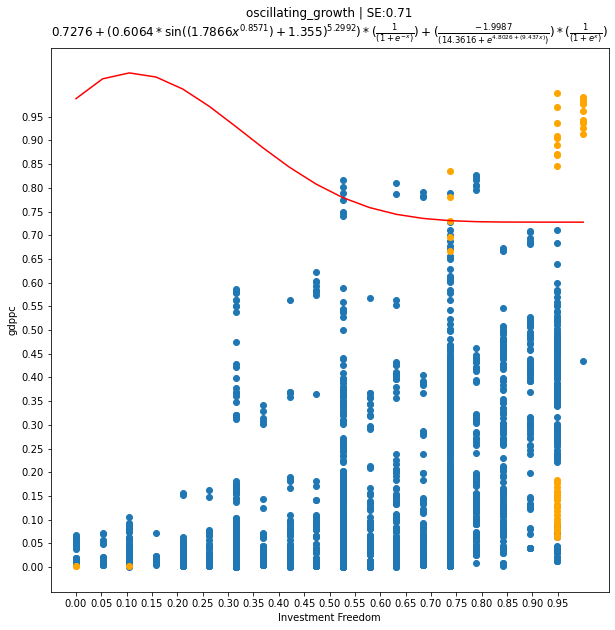

************double_gaussian*************
Fitted


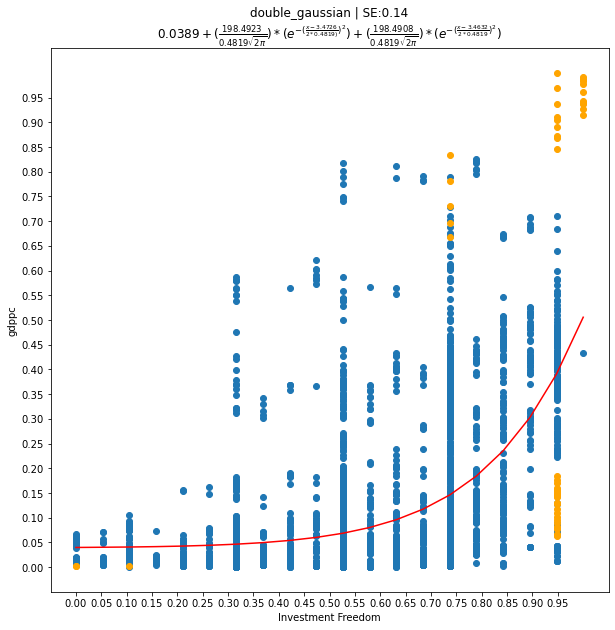

=========X: gdppc, Y: MobCelSub=========
******************sin*******************
Fitted


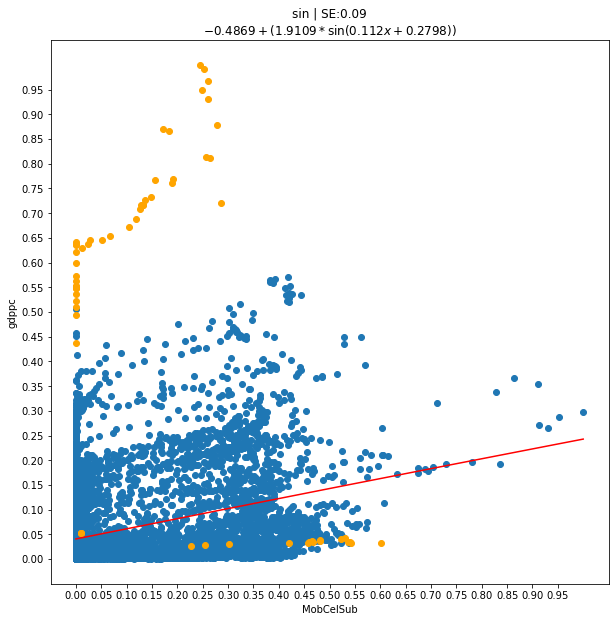

******************sinh******************
Fitted


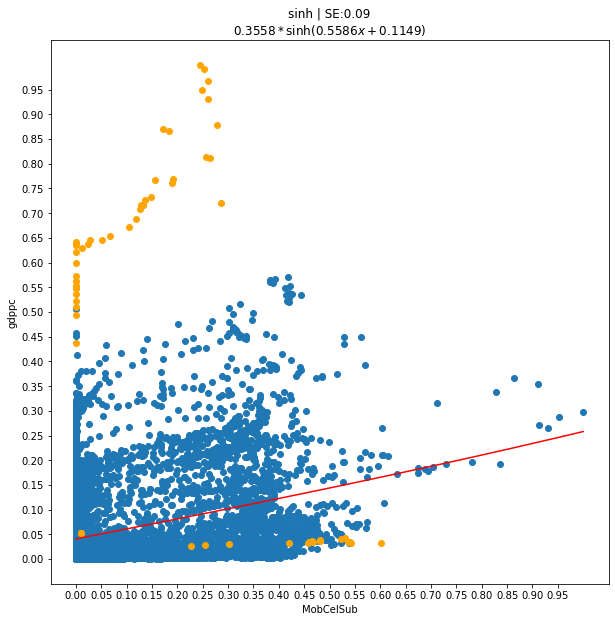

******************cos*******************
Fitted


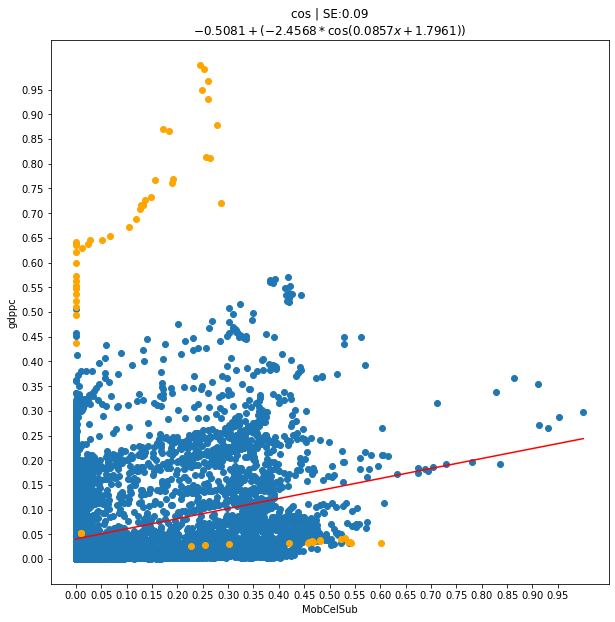

******************cosh******************
Fitted


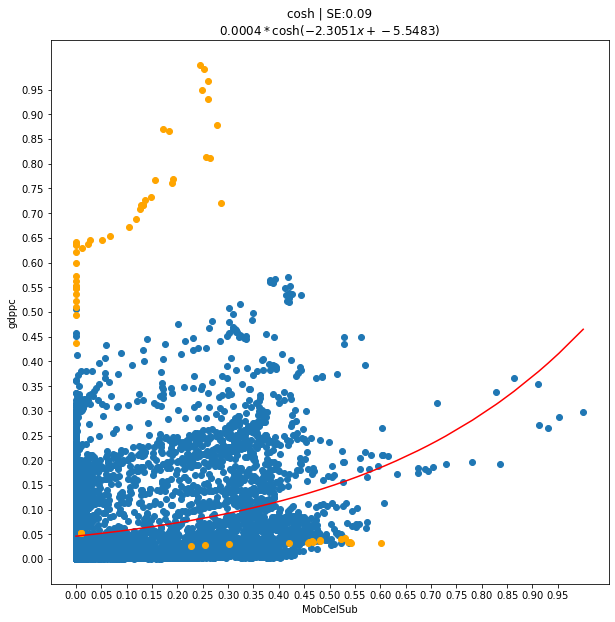

******************tan*******************
RuntimeError in function tan 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
******************tanh******************
Fitted


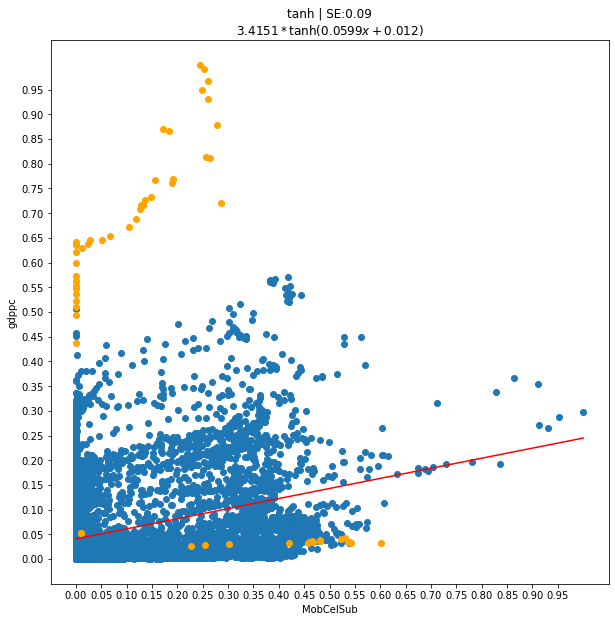

******************lnx*******************
Fitted


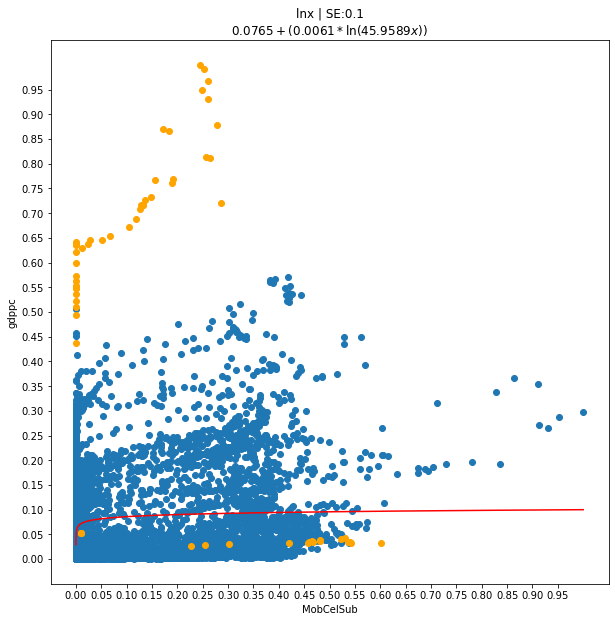

******************logx******************
Fitted


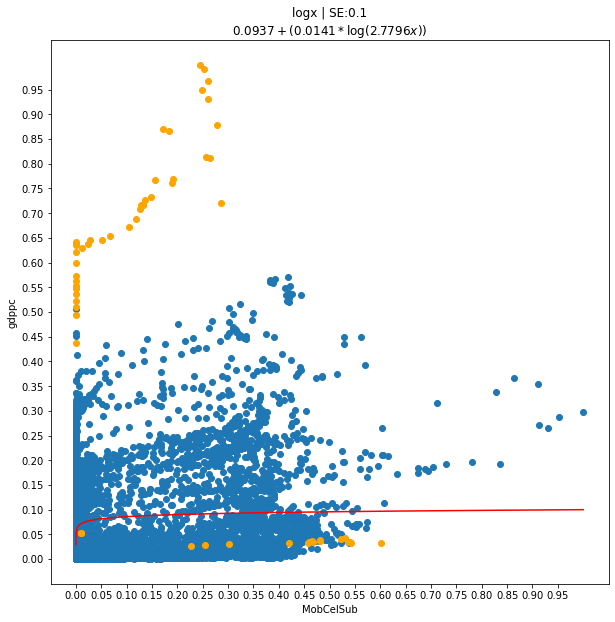

***************euler_exp****************
Fitted


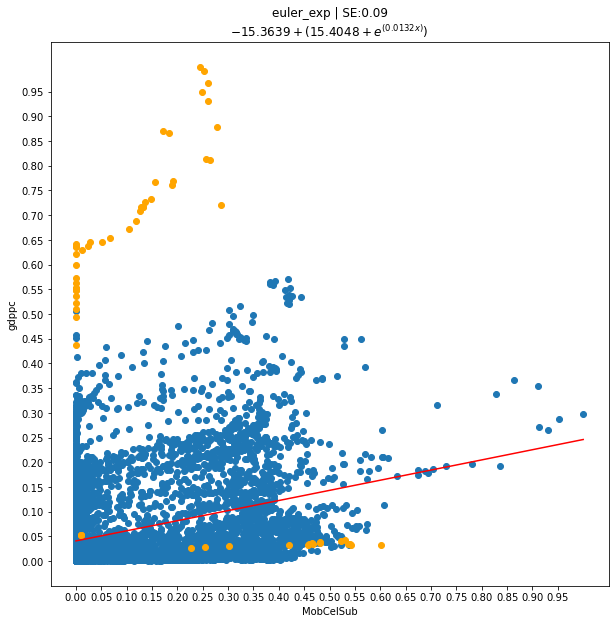

******************exp*******************
Fitted


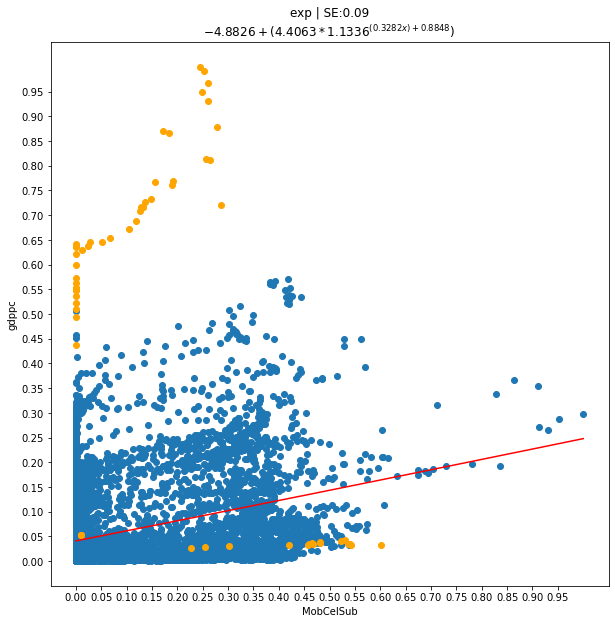

****************logistic****************
Fitted


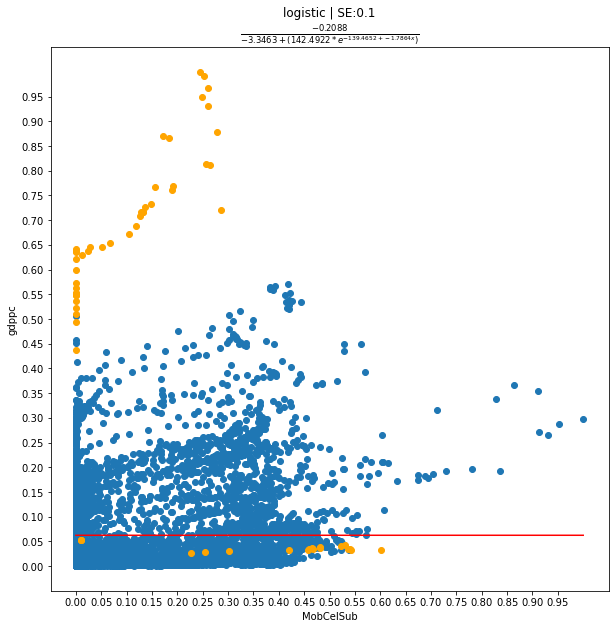

***************polynomial***************
Fitted


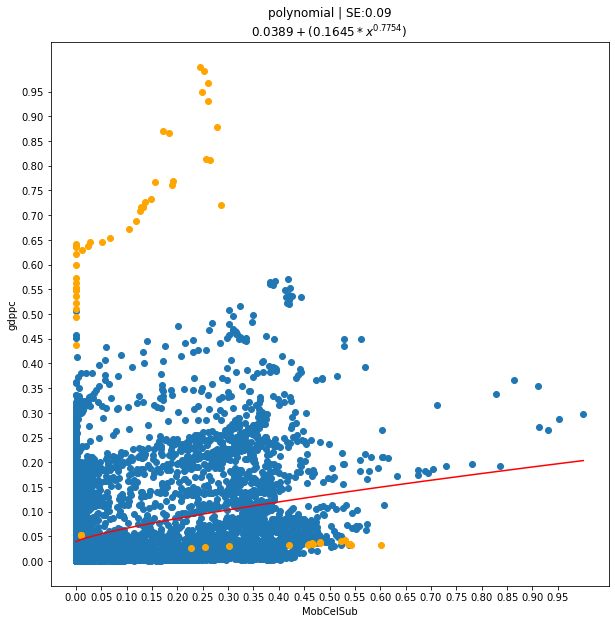

***********oscillating_growth***********
Fitted


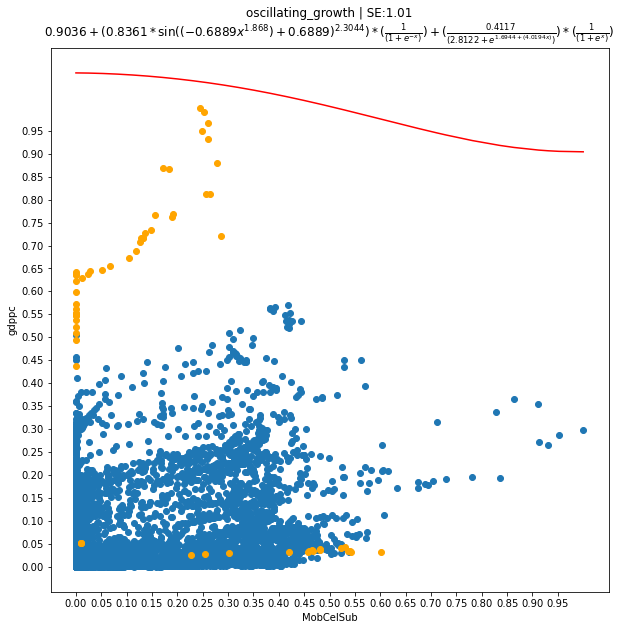

************double_gaussian*************
Fitted


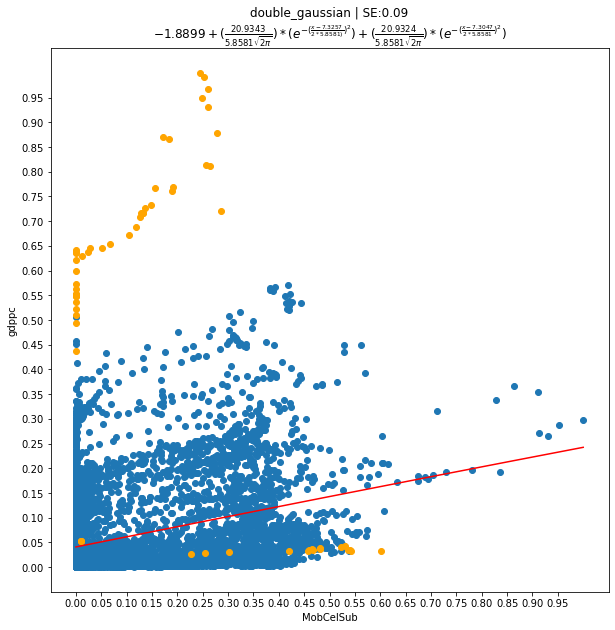

In [83]:
Opt_Forms_Dict  ,All_Forms_Dict ,  Error_Terms = cpt.panel(standardization=True,
                                                           drop_outliers=True,
                                                           plot=True,
                                                           show_outliers=True,
                                                           plot_predicted_outliers=True)

# Time series Regression
## list of arguments and their default values
    max_epochs: int = 8000,
    alpha: float = 0.05,
    standardization: bool = True,
    drop_outliers: bool = False,
    outlier_method: str = CST.Beta_Method,
    plot: bool = False,
    plot_only_best: bool = True,
    show_time_label: bool = False,
    show_outliers: bool = False,
    plot_predicted_outliers: bool = False
## Structure of returned dictionaries
Opt_Forms_Dict[independent var] => dictionary[categories] => summary object of the optimal equation format
All_Forms_Dict[independent var] => dictionary[categories] => dictionary[equation forms] => summary object
All_Forms_Dict[independent var] => dictionary[categories]=> dictionary[equation forms] => error if there is any.

In [84]:
Opt_Forms_Dict  ,All_Forms_Dict ,  Error_Terms = cpt.time_series(standardization=True,
                                                                 drop_outliers=True,
                                                                 plot=False,
                                                                 show_outliers=True,
                                                                 plot_predicted_outliers=True)

********Looking for the outliers********
Outliers have been dropped. It is highly recommended to check droppedvalues by an expert.
All rows are null/zero value and dropped for variable = gdppc, category = British Virgin Islands and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Channel Islands and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Curacao and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = French Polynesia and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Gibraltar and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Korea, Dem. People�s Rep. and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = New Caledonia and time = ALL.
All rows are null/zero value and dropped for variable = gdppc, category = Sint Maarten (Dutch part) and time = ALL.
All rows 

E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """
E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """



All rows are null/zero value and dropped for variable = Investment Freedom, category = Russian Federation and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = San Marino and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Sao Tome and Principe and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Serbia and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Sint Maarten (Dutch part) and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = Somalia and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = South Sudan and time = ALL.
All rows are null/zero value and dropped for variable = Investment Freedom, category = St. Kitts and Nevis and time = ALL.
All rows are null/zero value and dropped for varia

E:\OneDrive\OneDrive - NTNU\PhD\copatrec\copatrec.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  """


All rows are null/zero value and dropped for variable = MobCelSub, category = St. Martin (French part) and time = ALL.
===X: gdppc, Y: Government Integrity====
----------Category:Afghanistan----------
Analysis error: The number of observations are less than 10.
------------Category:Albania------------
******************sin*******************
Fitted
******************sinh******************
Fitted
******************cos*******************
Fitted
******************cosh******************
Fitted
******************tan*******************
Fitted
******************tanh******************
Fitted
******************lnx*******************
Fitted
******************logx******************
Fitted
***************euler_exp****************
Fitted
******************exp*******************
Fitted
****************logistic****************
Fitted
***************polynomial***************
Fitted
***********oscillating_growth***********
Fitted
************double_gaussian*************
Fitted
------------Category:Alge

IndexError: list index out of range

# Cross-sectional Regression
## list of arguments and their default values
    max_epochs: int = 8000,
    alpha: float = 0.05,
    standardization: bool = True,
    drop_outliers: bool = False,
    outlier_method: str = CST.Beta_Method,
    plot: bool = False,
    plot_only_best: bool = True,
    show_category_label: bool = False,
    show_outliers: bool = False,
    plot_predicted_outliers: bool = False
## Structure of returned dictionaries
Opt_Forms_Dict[independent var] => dictionary[time] => summary object of the optimal equation format
All_Forms_Dict[independent var] => dictionary[time] => dictionary[equation forms] => summary object
All_Forms_Dict[independent var] => dictionary[time]=> dictionary[equation forms] => error if there is any.

In [ ]:
Opt_Forms_Dict  ,All_Forms_Dict ,  Error_Terms = cpt.cross_sectional(standardization=True,
                                                                     drop_outliers=True,
                                                                     plot=True,
                                                                     show_outliers=True,
                                                                     plot_predicted_outliers=True)

In [ ]:
Opt_Forms_Dict

All_Forms_Dict is a dictionary which for each key[Independent varibales] holds 
    1. R2 # between 0 and 1, the closer to the 1, the better-fitted form
    2. equation form like sin or cos or sinh or...
    3. coefficient lists respectively, 

    for example 
    'InDependentVariable1': [
        (0.9010271378720828,'sin',array([0.83247299, 2.17646987])),
        (0.840644418935836, 'sinh', array([4.34602403e+02, 3.31083016e-03]))
    ]
    says
    for 'InDependentVariable1' we checked the sin form, and its R2 is 0.9010271378720828, and its coefficients are [0.83247299, 2.17646987]
    which tells us the equation form is like 
    "Y = 0.83247299 * sin (X * 2.17646987)" 
    or in this case, using the varibale names
    "DependentVariable = 0.83247299 * sin (InDependentVariable1 * 2.17646987)"

In [ ]:
All_Forms_Dict

DataAllYhats is a dictionary which for each key[Independent varibales] holds a data-frame including 
    1. Dependent Variable Data
    2. Independent variable Data
    3. Independent variable data generated using the corresponding fitted equations
    for example, InDependentVariable1sinhYhat says using InDependentVariable1 data and its corresponding sinh equation that we have fitted this column 
    contains estimated data of Dependent Variable (Y). 
    If the dependent variable is called Y, then the corresponding estimated data called Yhat because they are not the original data; they are estimated from using the equation

Error_Terms is a dictionary with keys = (Independent variable , function name) and values = error that occcures.

In [ ]:
Error_Terms

Opt_Forms_Dict  ,All_Forms_Dict ,  DataAllYhats , Error_Terms  = SM.Per_Time_OptForms() #Apply Panel regression to all data per year
Opt_Forms_Dict ,All_Forms_Dict ,  DataAllYhats , Error_Terms  = SM.Per_Category_OptForms() #Apply Panel regression to all data per category
The outputs are as same as panel regression, but keys depend on the time or category, respectively.

In [ ]:
Opt_Forms_Dict  ,All_Forms_Dict ,  DataAllYhats , Error_Terms  = SM.Per_Time_OptForms() 
Opt_Forms_Dict ,All_Forms_Dict ,  DataAllYhats , Error_Terms  = SM.Per_Category_OptForms() 